In [1]:
import ptracer as pt
import numpy as np
from importlib import reload
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

# Normalisation

In [3]:
a = np.array([
    [0,1,0],
    [0,1,1],
    [1,1,1],
    [-3,0,0],
    [-3,0,-1]
])

In [4]:
[pt.normalize(v) for v in a]

[array([0., 1., 0.]),
 array([0.        , 0.70710678, 0.70710678]),
 array([0.57735027, 0.57735027, 0.57735027]),
 array([-1.,  0.,  0.]),
 array([-0.9486833 ,  0.        , -0.31622777])]

In [5]:
pt.normalize_array(a)

array([[ 0.        ,  1.        ,  0.        ],
       [ 0.        ,  0.70710678,  0.70710678],
       [ 0.57735027,  0.57735027,  0.57735027],
       [-1.        ,  0.        ,  0.        ],
       [-0.9486833 ,  0.        , -0.31622777]])

# Basic RF

In [6]:
rf = pt.BasicRF(0, [z for z in range(5)], 3, [1,1,1], 0.5)
print(rf.origins)
print(rf.dirs)
print(rf.weights)
print(rf.wavelength)

[[0. 0. 3.]
 [0. 1. 3.]
 [0. 2. 3.]
 [0. 3. 3.]
 [0. 4. 3.]]
[[0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]
 [0.57735027 0.57735027 0.57735027]]
[0.5 0.5 0.5 0.5 0.5]
600.0


# Scene

In [7]:
scene = pt.Scene(rf, [])
scene.r_origins

array([[0., 0., 3.],
       [0., 1., 3.],
       [0., 2., 3.],
       [0., 3., 3.],
       [0., 4., 3.]])

In [8]:
scene.r_dirs

array([[0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027],
       [0.57735027, 0.57735027, 0.57735027]])

In [9]:
scene.propagate(1)
scene.r_origins

array([[0.57735027, 0.57735027, 3.57735027],
       [0.57735027, 1.57735027, 3.57735027],
       [0.57735027, 2.57735027, 3.57735027],
       [0.57735027, 3.57735027, 3.57735027],
       [0.57735027, 4.57735027, 3.57735027]])

# Surface

In [10]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [11]:
rf = pt.BasicRF(-1,1,np.linspace(0,2,20),[1,-1,0])
surface = pt.Surface([0,0,0], [0,1,1], n_in=1.5, reflective=False)
scene = pt.Scene(rf, [surface])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


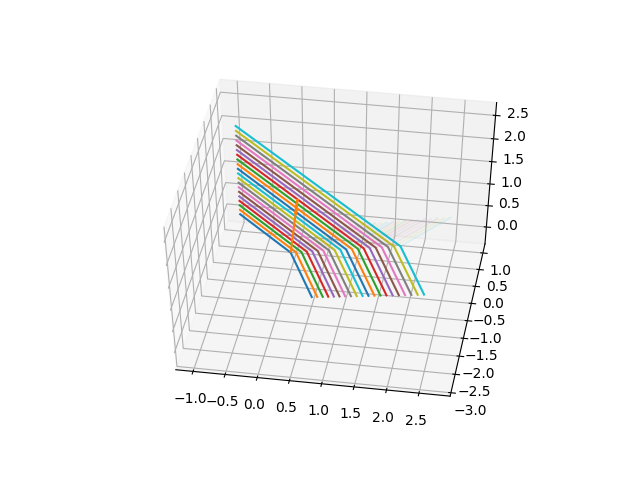

[[0. 0. 0.]]
[[1.48029737e-17 1.34567263e-02 1.34567263e-02]]


In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)

In [13]:
scene.r_weights

array([0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.91081329, 0.91081329, 0.91081329, 0.91081329, 0.91081329,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671,
       0.08918671, 0.08918671, 0.08918671, 0.08918671, 0.08918671])

# Spheres

In [14]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

In [15]:
rf = pt.BasicRF(-1,np.linspace(-1,1,20),np.linspace(-1,1,20),[1,0,0])
sphere = pt.Sphere([0,0,0], 0.5, n_in=1.3)
scene = pt.Scene(rf, [sphere])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


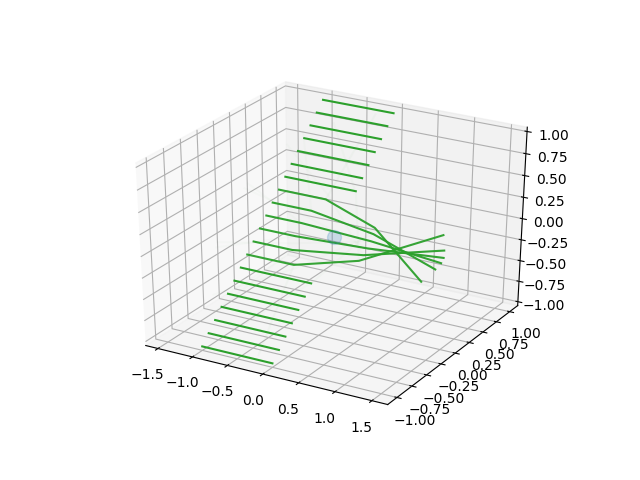

[[0. 0. 0.]]
[[ 1.06592751e-03 -2.52355114e-19 -2.52355114e-19]]


In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True, ray_kwargs={"c":"tab:green"})

# Making a hexagonal lattice

2 5
1 5
0 5
1 5
2 5


<IPython.core.display.Javascript object>


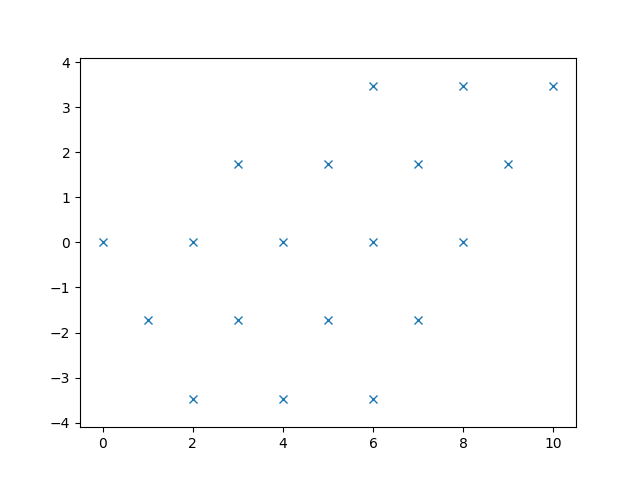

(-0.5, 10.5, -3.8105117766515297, 3.8105117766515297)

In [17]:
x = []
y = []
for j in range(-2, 3):
    n = 5-abs(j)
    print(abs(j), n+abs(j))
    for k in range(abs(j), n+abs(j)):
        x.append(j + 2*k)
        y.append(np.sqrt(3)*j)
fig, ax = plt.subplots()
ax.plot(x, y, "x")
ax.axis("equal")

169
15


<IPython.core.display.Javascript object>


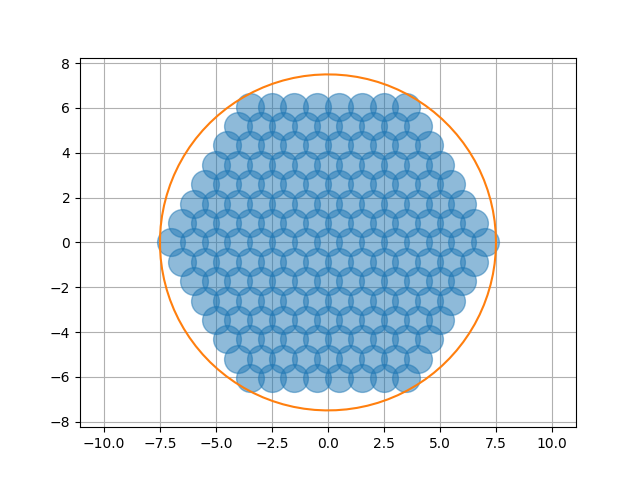

In [31]:
# Define n as the number of layers
n = 8
print(3*n*(n-1) + 1)
a = 2*n-1
print(a)

x = []
y = []
for j in range(-n+1, n):
    for i in range(-(a//2), a//2-abs(j)+1):
        x.append(i + abs(j)/2)
        y.append(np.sqrt(3)*j/2)
fig, ax = plt.subplots()
ax.plot(x, y, "o", ms=20, alpha=0.5)

t = np.linspace(0, np.pi*2, 100)
ax.plot((n-.5)*np.cos(t), (n-.5)*np.sin(t))

ax.axis("equal")
ax.grid()

# Let's try circles!

4 0.2857142857142857 0.3714198211140642


<IPython.core.display.Javascript object>


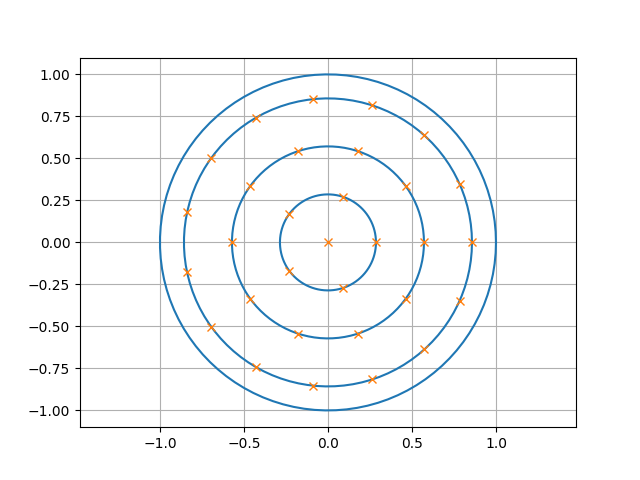

31


In [19]:
# Parameters
N = 30
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)
d_ring = np.pi * d * n * (n-1)/(N-1)
print(n, d, d_ring)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
for i in range(1, n):
    n_ring = round(2*np.pi*i*d/d_ring)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

<IPython.core.display.Javascript object>


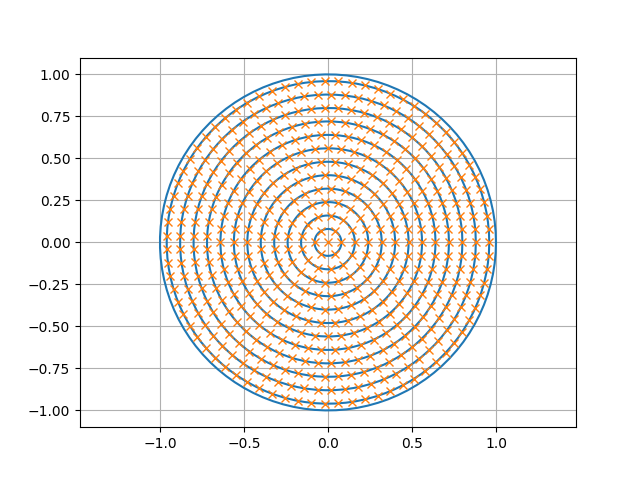

491


In [20]:
# Parameters
N = 500
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
for i in range(1, n):
    n_ring = round(2*np.pi*i)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

4 0.2857142857142857 0.32639923673660187


<IPython.core.display.Javascript object>


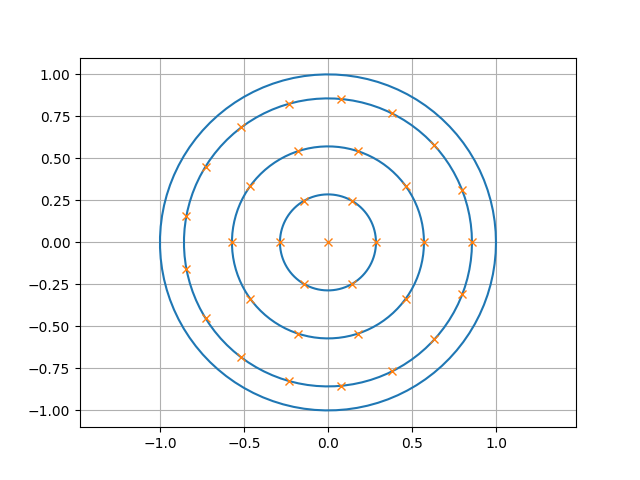

-0.16319961836830088
0.3263992367366022
-0.1631996183683011
34


In [21]:
# Parameters
N = 34
R = 1

# Calculated properties
n = round(.5*(1 + np.sqrt(1+4*(N-1)/np.pi)))
d = R/(n-.5)
d_ring = np.pi * d * n * (n-1)/(N-1)
print(n, d, d_ring)

fig, ax = plt.subplots()
a = 1

t = np.linspace(0, np.pi*2, 100)
ax.plot(R*np.cos(t), R*np.sin(t), c="tab:blue")
ax.plot(0, 0, "x", c="tab:orange")
offset = 0
for i in range(1, n):
    n_ring = round((2*np.pi*i*d + offset)/d_ring)
    offset = (2*np.pi*i*d + offset) - n_ring*d_ring
    print(2*np.pi*i*d - n_ring*d_ring)
    a += n_ring
    t_ring = np.arange(0, 2*np.pi, 2*np.pi/n_ring)
    ax.plot(i*d*np.cos(t), i*d*np.sin(t), c="tab:blue")
    ax.plot(i*d*np.cos(t_ring), i*d*np.sin(t_ring), "x", c="tab:orange")
ax.axis("equal")
ax.grid()
print(a)

# Adaptive Gaussian RF

In [22]:
reload(pt)

<module 'ptracer' from '/home/jdranczewski/Documents/Imperial/UROP20/optical-levitation-raytracing-experiments/ptracer.py'>

<IPython.core.display.Javascript object>


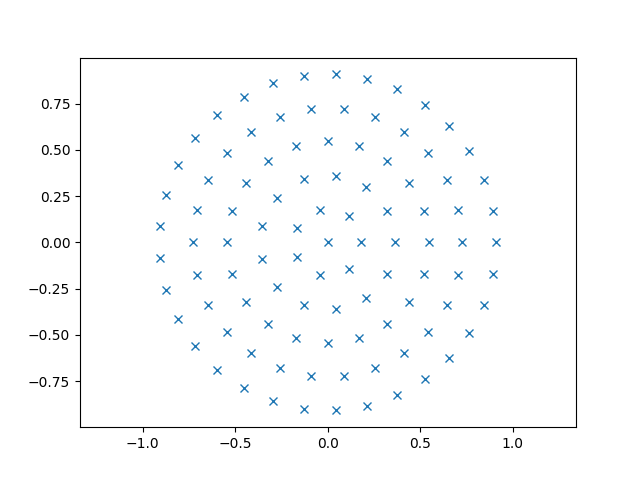

(-0.9956777442743081,
 0.9997941782987767,
 -0.998867339183008,
 0.998867339183008)

In [23]:
rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], .5, 1, 100, 600, [0,0,0], 1)
fig, ax = plt.subplots()
ax.plot(rf.origins[:,0], rf.origins[:,1], "x")
ax.axis("equal")

In [24]:
np.sum(rf.weights) * 6.62607004e-25 * 299792458 / 600

1.0205501325655228

# Ray bundle in action

In [25]:
rf = pt.AdaptiveGaussianRF([0,0,0], [0,0,1], .3, 1, 100, 600, [0,0,0], 0.5)
sphere = pt.Sphere([0,0,3], 0.5, n_in=1.3)
scene = pt.Scene(rf, [sphere])
scene.run()
scene.propagate(1)

<IPython.core.display.Javascript object>


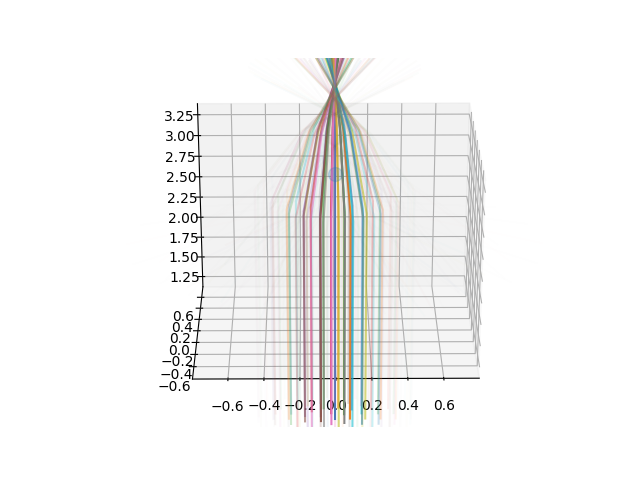

[[0. 0. 3.]]
[[-1.73085734e-01  3.26369222e-02  4.59874943e+14]]


In [26]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scene.plot(ax, m_quiver=True)